# TP N°3 : Classification supervisée : Apprentissage et évaluation

# TP3_DM_JiheneHANI_RymKALLEL_MohamedMelekMARZOUKI_GL4_groupe2

# I- Jeux de données :

In [1]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',width=300, height=200)

In [2]:
from sklearn import datasets
irisData = datasets.load_iris()
print (irisData.data)
print (irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
print (irisData.data.size)

600


In [4]:
print (irisData.target.size)

150


la taille est 600 car il y a 150 150 exemples de critères observés et 4 attributs => 4*150 =600 Il y a 3 classes, pour les étiquettes 0 , 1 et 2

In [5]:
setosa=0
versicolor=0
virginica=0
for i in irisData.target:
    if i==0 :
        setosa +=1
    if i==1 :
        versicolor +=1
    if i==2 :
        virginica +=1
print("Nombre de données dans la classe setosa est ",setosa, "\nNombre de données dans la classe versicolor est ",versicolor,"\nNombre de données dans la classe virginica est ", virginica)

Nombre de données dans la classe setosa est  50 
Nombre de données dans la classe versicolor est  50 
Nombre de données dans la classe virginica est  50


In [6]:
print("Les attributs de la classe 32 sont : ",irisData.data[31])

Les attributs de la classe 32 sont :  [5.4 3.4 1.5 0.4]


In [7]:
#charger les bibliothèques matplotlib  , pylab et itertools 
import matplotlib
import pylab as pl
from itertools import cycle

#définition de la fonction plot_2D pour 
def plot_2D(data, target, target_names):
    # instanciation du cycle de couleurs
    colors = cycle('rgbcmykw') 
    #création d'un tableau d'id ayant la longueur des target_names
    target_ids = range(len(target_names))
    #appel de la fonction figure  pour  la création de figure
    pl.figure()
    #parcours du tableau des ids et des target_names, selon le cycle de couleur
    for i, c, label in zip(target_ids, colors, target_names):
        #division des instances selon leurs classes
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
    #appel de la fonction legend  pour écrire la légende du schéma   
    pl.legend()
    #appel de la fonction show pour visualiser la figure
    pl.show()

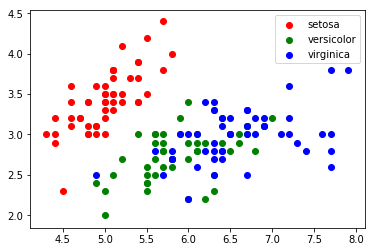

In [8]:
#Utilisation de la fonction
plot_2D(irisData.data,irisData.target,irisData.target_names)

In [9]:
import matplotlib
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') 
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        #d'autres couple d'attributs
        pl.scatter(data[target == i, 2], data[target == i, 1], c=c, label=label)  
    pl.legend()
    pl.show()

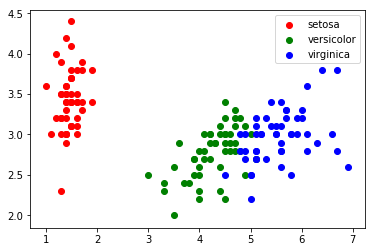

In [10]:
plot_2D(irisData.data,irisData.target,irisData.target_names)

f(x) : x = 2.5 ou f(x)= 2.25 + x

# Un premier apprentissage de classiffieur

In [11]:
from sklearn import naive_bayes
#fit_prior Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
irisData = datasets.load_iris() #chargement de la dataset
#la fonction fit   apprend un modèle à partir des données 
#(ce modèle est stocké en interne dans un enregistrement de la variable clf)
#[: - 1] représente la totalité du tableau, à l'exception de sa derniere case
nb.fit(irisData.data[:-1], irisData.target[:-1])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
temp=irisData.data[31]
temp= temp.reshape(1,-1) 
p31 = nb.predict(temp) #renvoie un tableau qui stocke, pour
#chaque nouvelle donnée en entrée, la classe prédite par le modèle précédemment appris
#via l'estimateur 
print (p31)

[0]


In [13]:
temp2= irisData.data[-1]
temp2= temp2.reshape(1,-1) 
plast = nb.predict(temp2)#prediction à l'aide du model 
print (plast)

[2]


In [14]:
P = nb.predict(irisData.data[:])#prediction à l'aide du model de tou le tablea[:]
print (P)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

Ce programme prédit les classes des données du rang 100 au rang 149 , se basant sur l'apprentissage de données selon l'algorithme naive bayes

# III- Evaluer les performances d'un classiffieur

In [16]:
Y = irisData.target
ea = 0
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea= ea + 1
print (ea/len(irisData.data))

0.03333333333333333


In [17]:
P-Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

Les valeurs nulles représentent une égalité entre la colonne d'indice i du tableau P et du tableau Y, les valeurs non nullles sont les valeurs ou la prédiction est différente de la classe définie dans le target

In [18]:
from collections import Counter
(len(P) - Counter(P-Y)[0])/len(irisData.data)

0.03333333333333333

In [19]:
#methode 1 avec la methode score
nb.score(irisData.data,P)

0.6866666666666666

In [20]:
#methode 2 avec la formule 1-e
1-((len(P) - Counter(P-Y)[0])/len(irisData.data))

0.9666666666666667

# 2. Performances en généralisation

In [21]:
import random
import numpy
def split(S):
        #data
        dataS1= range(len(S.data))
        dataS2= range(len(S.data))
        #int 1/3 et 2/3 
        deuxtiers=int(len(S.data)*2/3)+1
        untiers=int(len(S.data)/3)
        #target
        targetS1=range(deuxtiers)
        targetS2=range(untiers)
       
        dataS1=random.sample(list(S.data),deuxtiers )
        dataS2=random.sample(list(S.data),untiers )
    
        targetS1=random.sample(list(S.target),deuxtiers )
        targetS2=random.sample(list(S.target),untiers )
        
        return [dataS1, targetS1, dataS2, targetS2]

In [22]:
split(irisData)

[[array([6.3, 3.3, 6. , 2.5]),
  array([5.5, 2.6, 4.4, 1.2]),
  array([5.8, 2.7, 4.1, 1. ]),
  array([6. , 3. , 4.8, 1.8]),
  array([5.5, 2.3, 4. , 1.3]),
  array([6.9, 3.1, 4.9, 1.5]),
  array([4.8, 3.4, 1.6, 0.2]),
  array([4.6, 3.1, 1.5, 0.2]),
  array([5. , 2.3, 3.3, 1. ]),
  array([5.1, 3.8, 1.5, 0.3]),
  array([6.7, 3.1, 5.6, 2.4]),
  array([5.5, 3.5, 1.3, 0.2]),
  array([4.6, 3.6, 1. , 0.2]),
  array([6.6, 3. , 4.4, 1.4]),
  array([5.5, 4.2, 1.4, 0.2]),
  array([5.1, 3.3, 1.7, 0.5]),
  array([5.8, 4. , 1.2, 0.2]),
  array([5.2, 2.7, 3.9, 1.4]),
  array([5.7, 3.8, 1.7, 0.3]),
  array([6.3, 3.4, 5.6, 2.4]),
  array([4.8, 3. , 1.4, 0.3]),
  array([6.3, 2.8, 5.1, 1.5]),
  array([6.5, 3.2, 5.1, 2. ]),
  array([5.7, 4.4, 1.5, 0.4]),
  array([5.8, 2.7, 5.1, 1.9]),
  array([7.3, 2.9, 6.3, 1.8]),
  array([5. , 3.5, 1.6, 0.6]),
  array([7.7, 2.6, 6.9, 2.3]),
  array([5.3, 3.7, 1.5, 0.2]),
  array([5.1, 3.4, 1.5, 0.2]),
  array([6.3, 2.3, 4.4, 1.3]),
  array([6.9, 3.1, 5.1, 2.3]),
  array(

In [23]:
def test(S,nb):
    resultatSplit=split(S) 
    premierepartie=resultatSplit[0]
    deuxiemepartie=resultatSplit[2]
    target1=resultatSplit[1] 
    target2=resultatSplit[3]
    nb.fit(premierepartie[:-1], target1[:-1])
    prediction=nb.predict(deuxiemepartie)
    r=0.0
    r=1-((len(prediction) - Counter(prediction-target2)[0])/len(deuxiemepartie))
    return(r) 

In [24]:
test (irisData, nb)

0.24

L'erreur est légèrement supérieure

In [25]:
def testRepet(nombre, S, nb):
    e=0.0
    t=0.0
    for i in range (1, nombre):
        t=test(S,nb)
        e=e+t
    emoy=e/nombre
    print(emoy)

In [26]:
testRepet(10, irisData, nb)

0.31399999999999995


In [27]:
testRepet(50, irisData, nb)

0.3232000000000001


In [28]:
testRepet(100, irisData, nb)

0.32940000000000014


In [29]:
testRepet(200, irisData, nb)

0.3255000000000001


In [30]:
testRepet(500, irisData, nb)

0.3290799999999999


In [31]:
testRepet(1000, irisData, nb)

0.3331999999999989


In [32]:
for i in (1 , 20):
    testRepet(10, irisData, nb)

0.28800000000000003
0.30799999999999994


Oui 0,33

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(irisData.data,irisData.target,test_size=0.33)

In [34]:
nb.score(X_test,y_test)

0.48

# 2.2 Estimer l'erreur réelle par validation croisée

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, irisData.data, irisData.target, cv=10)

In [36]:
scores

array([1.        , 1.        , 1.        , 0.93333333, 0.86666667,
       0.93333333, 0.8       , 1.        , 1.        , 1.        ])

In [37]:
scores = cross_val_score(nb, irisData.data, irisData.target, cv=2)

In [38]:
scores

array([0.96      , 0.94666667])

In [39]:
scores = cross_val_score(nb, irisData.data, irisData.target, cv=5)

In [40]:
scores

array([1.        , 0.96666667, 0.9       , 0.9       , 1.        ])

In [41]:
scores = cross_val_score(nb, irisData.data, irisData.target, cv=8)

In [42]:
scores

array([1.        , 1.        , 0.94444444, 0.88888889, 0.88888889,
       0.88888889, 1.        , 1.        ])

In [43]:
[["Model", "erreur calculée" , "erreur estimée"],["Naive bayes", 0.33 , 0.3],["Decision tree",  0, 0.4]]

[['Model', 'erreur calculée', 'erreur estimée'],
 ['Naive bayes', 0.33, 0.3],
 ['Decision tree', 0, 0.4]]

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier(random_state=0)

In [46]:
cross_val_score(clf, irisData.data, irisData.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

L'arbre de decision a une moyenne d'erreur de 9,59 alors que naives bayes a 9,532 , Naives bayes est meilleure que decision tree